In [142]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [143]:
import pandas as pd
import numpy as np
import re
import nltk
df = pd.read_csv('C:\\Ashish\\Project\\dataset\\trainset1.csv')#,nrows = 1500)
df.text[:5]

0    #weather Another #fakenews video @CNN Anderson...
1    Staring Down Hurricane Florence via NASA https...
2    #hurricane #florence http:// tra.one/tcphurFlo...
3    Hurricane Florence is still moving through the...
4    Houston is collecting donations for Hurricane ...
Name: text, dtype: object

In [144]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove twitter handles (@user)
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [145]:
#TO DO - REMOVE ASCII EXTENDED
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = tweet.lower()
    tweet = re.sub(r"\S+\/.\S+ *\S+|.\S+html|\S+-\S+|\d*\/\d+|\d+|#\S+|\S+%\S+|\S+:\S*|\S+=\S+", "", tweet)
    tweet = tweet.encode("ascii", errors="ignore").decode()
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [146]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    word_tokens = word_tokenize(tweet) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    tweet = ' '.join(filtered_sentence)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [147]:
custom_words = ['via','rt','fav','…','am','et','pm','n\'t','y\'all']
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    querywords = tweet.split()
    resultwords  = [word for word in querywords if word.lower() not in custom_words]
    result = ' '.join(resultwords)
    df.iloc[i,df.columns.get_loc('text')] = result

In [148]:
import string
remove = string.punctuation + ".‘’\''“”°…-—––•・®.:"
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = ' '.join(word.strip(remove) for word in tweet.split())
    tweet = tweet.strip()
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [149]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet =([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(tweet)])
    tweet = ' '.join(tweet)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [150]:
# REVIEW NEEDED
import nltk
words = set(nltk.corpus.words.words())
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = ' '.join(word for word in tweet.split() if len(word)>3)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [151]:
count = df['text'].str.split().str.len()
df = df[~(count < 2)]

In [152]:
#To check number of words and verify absence of sentences with length less than 3
# for index, row in df.iterrows():
#     print(len(row.text.split()))

In [153]:
for index, row in df.iterrows():
    print(row.text)

another video anderson cooper hype flood meanwhile firefighter spoof news
star hurricane florence nasa
hurricane florence still move atlantic morning wind eastern seaboard begin monitoring storm especially next week late model bring fairly close keep post
houston collect donation hurricane florence victim
still collect supply victim hurricane florence ingles tunnel road come
whats surprising hurricane florence thrive abnormally cool water
denim bunny hurricane florence hair
listen zello cajun navy hurricane florence group never discover
grandmama know wrong talk hurricane aint take shit paid neighbor look crazy
receive update city bowie part alert bowie message hurricane florence update bowie farmer market postpone
five death record thus regard hurricane florence deepest sympathy warmth family friend victim brother
hurricane florence move towards greenville local location tell employee shut storm
rain arrive earlier expect blargh feel like wait dental exam
even though hate love fema ne

reporter shit live feed
member congress witness decline civility american society remain silent wake reprehensible uncivil worthless roll paper towel
follow prayer protection
walmart grocery water aisle florence pack perrier left anyone want
last minute vacation back home hurricane florence watch
hurricane florence beast even cross displace come state help evacuee nowhere head make sure provide
hurricane florence webcam
tropical track hurricane florence storm surge
late satellite view take
offer important insurance deductible information consumer wake hurricane florence
almighty lift urgent plea directly path hurricane florence power calm storm life protect harm provide safe escape warm
governor lift order school closure hurricane florence sumter school district school office reopen monday september team assess school building ready welcome back student staff
hurricane florence dead include flood continue
great show support contribute recovery effort check awesome shirt head coach rive

screw place come load
know would never
want send well wish prayer family family hurricane florence path yall safe
student struggle battle hurricane florence
hurricane florence begin rapidly intensify today become major category three hurricane category four storm hour
woman shelter hurricane florence animal charge practice veterinary medicine without license
photo elderly couple hold hand hurricane florence nursing home evacuation warms heart
first death report hurricane florence make landfall unleash fury carolina
exit carolina still leave mark place like raleigh
video playlist florence strengthens category target carolina
leave island love right back
stay safe hurricane florence
outer band hurricane florence rock north carolina coast news reporting
live view ominously name cape fear river near atlantic coast hurricane florence arrive overnight thursday early friday morning reuters available stream
hurricane florence
still time register webinar auto form change flood policy tomorrow e

In [154]:
#----------END--OF--PRE-PROCESSING----------#

In [155]:
df2 = df[['text','category','day']]

In [156]:
df2 = df2[pd.notnull(df2['text'])]

In [157]:
df2['category_id'] = df2['category'].factorize()[0]
category_id_df = df2[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df2.head(40)

,text,category,day,category_id
0,another video anderson cooper hype flood meanw...,1,16,0
1,star hurricane florence nasa,1,12,0
3,hurricane florence still move atlantic morning...,0,6,1
4,houston collect donation hurricane florence vi...,2,23,2
6,still collect supply victim hurricane florence...,2,19,2
7,whats surprising hurricane florence thrive abn...,1,19,0
8,denim bunny hurricane florence hair,0,18,1
9,listen zello cajun navy hurricane florence gro...,2,14,2
10,grandmama know wrong talk hurricane aint take ...,0,13,1
12,receive update city bowie part alert bowie mes...,1,12,0


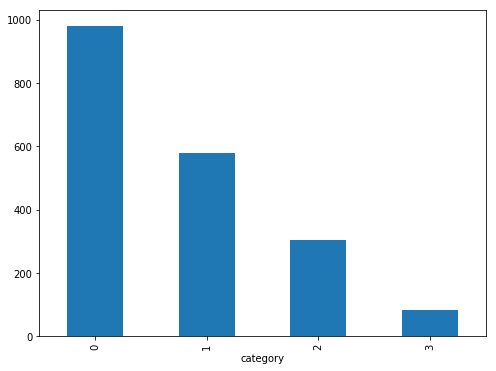

In [158]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [159]:
# for index, row in df.iterrows():
#     row.text = row.text + ' ' + str(row.day)
#     print(row.text)

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df2.text).toarray()
print(type(df2.day.values))
features = np.concatenate(features, df2.day.values)
labels = df2.category_id
features.shape

<class 'numpy.ndarray'>


TypeError: only integer scalar arrays can be converted to a scalar index

In [161]:
from sklearn.feature_selection import chi2

N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
#   print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# '0':
  . Most correlated unigrams:
. safe
. help
  . Most correlated bigrams:
. make landfall
. stay safe
# '1':
  . Most correlated unigrams:
. nasa
. category
  . Most correlated bigrams:
. category storm
. make landfall
# '2':
  . Most correlated unigrams:
. rescue
. help
  . Most correlated bigrams:
. victim hurricane
. help hurricane
# '3':
  . Most correlated unigrams:
. dutch
. mitigate
  . Most correlated bigrams:
. dutch stormwater
. stormwater management


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(df2['text'], df2['category'], df2['day'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train, z_train)

In [138]:
#Test one sentence
print(clf.predict(count_vect.transform(["hurricane damage"])))

[1]


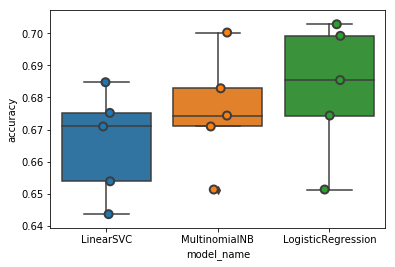

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [140]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.665667
LogisticRegression    0.682627
MultinomialNB         0.675943
Name: accuracy, dtype: float64

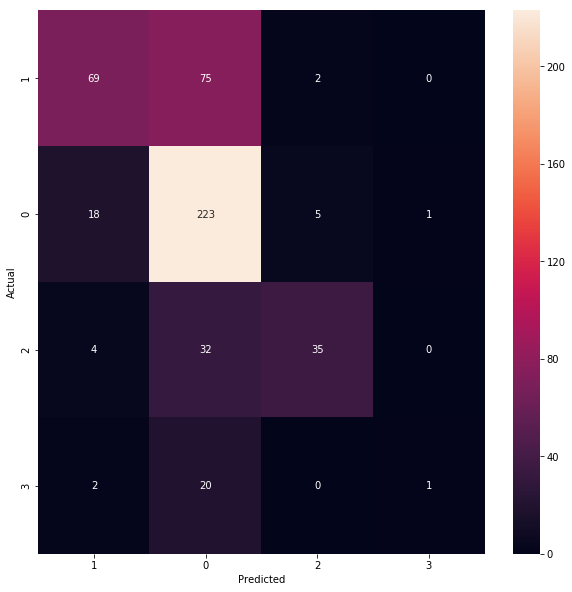

In [104]:
model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [72]:
from IPython.display import display
pd.set_option('display.max_rows', 500)
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'text']])
      print('')

'0' predicted as '1' : 18 examples.


,category,text
1284,0,head people along coast likely make landfall e...
1473,0,hurricane less mile coast track change much pa...
962,0,hurricane florence strengthens category storm
971,0,msnbc forecast warn storm surge foot rain plac...
1562,0,join pray carolina prepare hurricane florence ...
261,0,week south florida time hurricane florence gra...
37,0,yass queen fuck shit hurricane florence expect...
1820,0,hurricane florence could happen live
1089,0,remind hooker fluffed graham scott mcmaster co...
1753,0,hurricane florence could strengthen category p...



'1' predicted as '0' : 75 examples.


,category,text
745,1,wherever hurricane florence
498,1,wilmington seahawks move workout chapel hill h...
306,1,thank come prove even participate businness we...
539,1,performance cnns anderson cooper caught fake h...
80,1,leave trump hurricane florence tremendously tr...
1736,1,notice thousand people retweeted comment fake ...
1865,1,without power outer edge hurricane florence cr...
663,1,hurricane florence nears live surf video show ...
439,1,hurricane florence evacuation cause traffic
566,1,hurricane florence cause weatherman evacuate l...



'2' predicted as '0' : 32 examples.


,category,text
1676,2,military relief effort hurricane florence wind
245,2,hotel still room available click might still s...
1500,2,colorado send east relief
1087,2,virigina santa claus brought water love reinde...
30,2,disaster distress helpline provide immediate c...
692,2,cellular step give customer signal
81,2,found appear domesticate wander around lumbert...
1887,2,house pass reauthorization program include hur...
1470,2,fire rally relief machine stay tune
1776,2,military gear hurricane florence



'3' predicted as '0' : 20 examples.


,category,text
329,3,deadly storm hurricane typhoon roar asia
40,3,weve always fresh cinnamon roll blueberry roll...
1876,3,north carolina politician decry science make h...
1148,3,best deal paris accord deal
33,3,narrative cult
940,3,notice discrepancy live hard much help power b...
1735,3,trump tariff raise cost rebuild hurricane flor...
753,3,compare move towards carolina think large impact
1913,3,hurricane florence
1616,3,perhaps believe world scientist kind mess leav...


In [73]:
df2.text[1396]

'greeting south carolina thank president trump work hard american know really appreciate wish family neighbor friend quick recovery hurricane florence'

In [74]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'text']])
      print('')

'0' predicted as '1' : 18 examples.


,category,text
1284,0,head people along coast likely make landfall e...
1473,0,hurricane less mile coast track change much pa...
962,0,hurricane florence strengthens category storm
971,0,msnbc forecast warn storm surge foot rain plac...
1562,0,join pray carolina prepare hurricane florence ...
261,0,week south florida time hurricane florence gra...
37,0,yass queen fuck shit hurricane florence expect...
1820,0,hurricane florence could happen live
1089,0,remind hooker fluffed graham scott mcmaster co...
1753,0,hurricane florence could strengthen category p...



'1' predicted as '0' : 75 examples.


,category,text
745,1,wherever hurricane florence
498,1,wilmington seahawks move workout chapel hill h...
306,1,thank come prove even participate businness we...
539,1,performance cnns anderson cooper caught fake h...
80,1,leave trump hurricane florence tremendously tr...
1736,1,notice thousand people retweeted comment fake ...
1865,1,without power outer edge hurricane florence cr...
663,1,hurricane florence nears live surf video show ...
439,1,hurricane florence evacuation cause traffic
566,1,hurricane florence cause weatherman evacuate l...



'2' predicted as '0' : 32 examples.


,category,text
1676,2,military relief effort hurricane florence wind
245,2,hotel still room available click might still s...
1500,2,colorado send east relief
1087,2,virigina santa claus brought water love reinde...
30,2,disaster distress helpline provide immediate c...
692,2,cellular step give customer signal
81,2,found appear domesticate wander around lumbert...
1887,2,house pass reauthorization program include hur...
1470,2,fire rally relief machine stay tune
1776,2,military gear hurricane florence



'3' predicted as '0' : 20 examples.


,category,text
329,3,deadly storm hurricane typhoon roar asia
40,3,weve always fresh cinnamon roll blueberry roll...
1876,3,north carolina politician decry science make h...
1148,3,best deal paris accord deal
33,3,narrative cult
940,3,notice discrepancy live hard much help power b...
1735,3,trump tariff raise cost rebuild hurricane flor...
753,3,compare move towards carolina think large impact
1913,3,hurricane florence
1616,3,perhaps believe world scientist kind mess leav...


In [75]:
from sklearn import metrics

def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]

cat = (df2['category'].unique())
l = []

for element in cat:
    l.append('' + to_str(element))
print(metrics.classification_report(y_test, y_pred, target_names = l))

              precision    recall  f1-score   support

           1       0.74      0.47      0.58       146
           0       0.64      0.90      0.75       247
           2       0.83      0.49      0.62        71
           3       0.50      0.04      0.08        23

   micro avg       0.67      0.67      0.67       487
   macro avg       0.68      0.48      0.51       487
weighted avg       0.69      0.67      0.65       487



In [29]:
import altair as alt
from vega_datasets import data
import altair as alt
alt.renderers.enable('notebook')
source = data.unemployment_across_industries.url

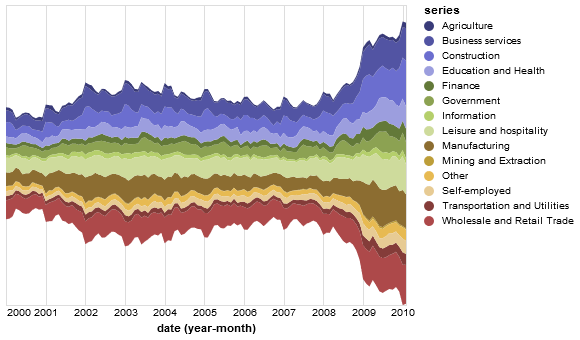

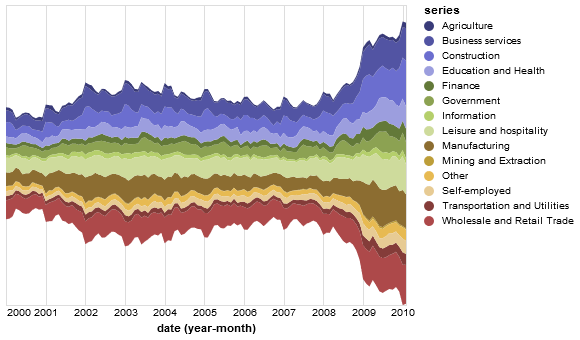

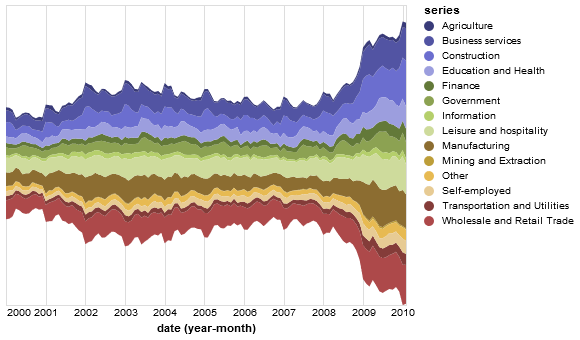

In [30]:
alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()